In [27]:
from utils.all import *

# 'batch_num' corresponds to the batches in the annotated folder
# 'preprocess' adds more data to each sentence, including SimpEval annotations
# The errors printed at the bottom are primarily because annotators will select a span
# but don't annotate that span
data = load_data('../annotated', batch_num=[5, 6], preprocess=True)

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'rachel', 'vinayak', 'ayush', 'anton', 'kelly', 'vishnesh'}

anton - Batch 5, HIT 38 (ID 37) has 2 deletion edits but 1 annotations. Likely a missing annotation. Skipping edit type...
vinayak - Batch 6, HIT 16 (ID 45) has 1 insertion edits but -1 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 deletion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 insertion edits but 3 annotations. Likely a missing annotation.

In [28]:
# This is a bit confusing, but each unique simplification has an ID, the three annotations
# corresponding to that simplification will have the same id, but they will have different
# 'user', 'batch_num' and 'hit_id' values corresponding to where they were annotated. This
# function can help find the sentence in the annotated data
sent = data[0]
get_sent_info(sent)

'anton - Batch 5, HIT 1 (ID 0)'

In [29]:
# The 'data' array and the 'sent' dict contain all information. In the below,
# we add 'edits' and 'processed_annotations' when we preprocess to convert the raw output
# to a usable format. Additionally, our sentence-level score is in 'score'. All three simpeval
# scores are also included
sent.keys()

dict_keys(['id', 'original', 'original_spans', 'simplified', 'simplified_spans', 'system', 'annotations', 'user', 'batch', 'hit_id', 'edits', 'processed_annotations', 'simpeval_scores', 'da_scores', 'likert_scores', 'score'])

In [30]:
# Print spans with comments
get_comments(data)

ANTON - HIT 3: no change


AYUSH - HIT 105: Annotating this was kind of hard, not sure how to show concatenation with the current taxonomy

ANTON - HIT 108: 



In [31]:
# The systems we looked at
systems = set([x['system'] for x in data])

# Edit types
edit_types = set(data[0]['annotations'].keys())

In [32]:
# Example: Searches for coreference errors
deletions = [process_annotation(k) for k in [i for j in [[x for x in sent['edits'] if x['type'] == 'deletion'] for sent in data] for i in j]]
for d in deletions:
    if d['error_type'] == Error.COREFERENCE:
        print(d)

In [33]:
# Example: Some of the annotations for sentence 0
data[0]['processed_annotations'][:2]

[{'edit_type': 'deletion',
  'id': 0,
  'information_impact': <Information.LESS: 'Generalization'>,
  'type': <Quality.QUALITY: 'No Error'>,
  'family': <Family.CONTENT: 'Content'>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3,
  'size': 0.008310249307479225,
  'reorder_level': None,
  'score': 0.970747553725849},
 {'edit_type': 'deletion',
  'id': 1,
  'information_impact': <Information.LESS: 'Generalization'>,
  'type': <Quality.QUALITY: 'No Error'>,
  'family': <Family.CONTENT: 'Content'>,
  'grammar_error': False,
  'error_type': None,
  'rating': 2,
  'size': 0.030470914127423823,
  'reorder_level': None,
  'score': 0.8085959365626684}]

In [34]:
# Example: Some of the edits for sentence 0
data[0]['edits'][:2]

[{'type': 'deletion',
  'id': 0,
  'original_span': [(92, 95)],
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'deletion',
  'id': 1,
  'original_span': [(113, 124)],
  'simplified_span': None,
  'annotation': ['good', 'no', 'no']}]

In [35]:
# Example: Agreement between annotators on edit types
# for edit_type in ['deletion', 'insertion', 'reorder', 'substitution']:
#     print(f'{edit_type} -> {calculate_agreement(data, edit_type, drop_no_spans=True)}')

In [36]:
# TODO: trivial edits on substitutions aren't being processed correctly
# for sent in data:
#     for ann in sent['processed_annotations']:
#         if ann['type'] == Quality.TRIVIAL and ann['rating'] == None:
#             print(sent['id'])
#             print([e for e in sent['edits'] if e['type'] == 'substitution'])
#             print(ann)
#             print(sent['system'])
#             print(sent['system'])
#             print(sent['user'])

In [37]:
# Prints the sentences where annotators identified insertion errors
for error in [Error.REPETITION, Error.CONTRADICTION, Error.HALLUCINATION, Error.IRRELEVANT]:
    print(f'\n{error.value}')
    for sent in data:
        for ann in sent['processed_annotations']:
            if ann['error_type'] == error:
                print(f'{get_sent_info(sent)} \t {system_name_mapping[sent["system"]]}')


Repetition
rachel - Batch 5, HIT 6 (ID 9) 	 Human 1
vinayak - Batch 6, HIT 22 (ID 21) 	 Human 2
vinayak - Batch 6, HIT 17 (ID 46) 	 Human 2
vinayak - Batch 6, HIT 8 (ID 69) 	 MUSS
rachel - Batch 5, HIT 18 (ID 76) 	 MUSS
vishnesh - Batch 5, HIT 39 (ID 76) 	 MUSS
vinayak - Batch 6, HIT 33 (ID 77) 	 Human 1
rachel - Batch 5, HIT 34 (ID 87) 	 MUSS
rachel - Batch 5, HIT 38 (ID 91) 	 MUSS
ayush - Batch 6, HIT 17 (ID 105) 	 Human 2
anton - Batch 6, HIT 29 (ID 127) 	 MUSS
ayush - Batch 6, HIT 28 (ID 127) 	 MUSS
rachel - Batch 6, HIT 21 (ID 127) 	 MUSS
ayush - Batch 6, HIT 29 (ID 128) 	 Human 1
rachel - Batch 6, HIT 23 (ID 128) 	 Human 1
ayush - Batch 6, HIT 4 (ID 137) 	 MUSS
kelly - Batch 6, HIT 9 (ID 137) 	 MUSS
vishnesh - Batch 6, HIT 19 (ID 137) 	 MUSS
rachel - Batch 6, HIT 16 (ID 141) 	 GPT-Few

Contradiction
vinayak - Batch 6, HIT 4 (ID 4) 	 MUSS
rachel - Batch 5, HIT 8 (ID 5) 	 GPT-Zero
rachel - Batch 5, HIT 26 (ID 79) 	 Human 1
ayush - Batch 6, HIT 7 (ID 95) 	 Human 2

Hallucination

I

In [38]:
# You can pass in 'original' or 'simplified'
sent = data[0]
generate_token_dict(sent['original'])

{(0, 3): {},
 (4, 16): {},
 (17, 19): {},
 (20, 30): {},
 (31, 38): {},
 (39, 41): {},
 (42, 43): {},
 (44, 51): {},
 (52, 55): {},
 (56, 58): {},
 (59, 72): {},
 (73, 80): {},
 (81, 91): {},
 (92, 95): {},
 (96, 104): {},
 (105, 112): {},
 (113, 115): {},
 (116, 124): {},
 (125, 129): {},
 (130, 133): {},
 (134, 143): {},
 (144, 154): {},
 (155, 157): {},
 (158, 163): {},
 (164, 171): {},
 (172, 181): {},
 (182, 184): {},
 (185, 188): {},
 (189, 197): {},
 (198, 201): {},
 (202, 207): {},
 (208, 214): {},
 (215, 223): {},
 (224, 226): {},
 (227, 228): {},
 (229, 234): {},
 (235, 244): {},
 (245, 247): {},
 (248, 261): {},
 (262, 264): {},
 (265, 268): {},
 (269, 278): {},
 (279, 282): {},
 (283, 286): {},
 (287, 291): {},
 (292, 299): {},
 (300, 310): {},
 (311, 313): {},
 (314, 317): {},
 (318, 322): {},
 (323, 325): {},
 (326, 329): {},
 (330, 334): {},
 (335, 342): {},
 (343, 346): {},
 (347, 351): {},
 (352, 361): {}}

In [39]:
# 'remove none' removes spans which are not annotated
# 'collapse composite' provides the underlying spans for structure/split edits

get_annotations_per_token([sent], 'original', remove_none=True, collapse_composite=False)

{(4, 16): {'structure': 1},
 (39, 41): {'structure': 1},
 (42, 43): {'structure': 1},
 (52, 55): {'structure': 1},
 (56, 58): {'structure': 1},
 (81, 91): {'split': 1},
 (92, 95): {'deletion': 1},
 (113, 115): {'deletion': 1},
 (116, 124): {'deletion': 1},
 (229, 234): {'substitution': 1},
 (235, 244): {'substitution': 1},
 (245, 247): {'substitution': 1},
 (248, 261): {'substitution': 1},
 (287, 291): {'deletion': 1},
 (292, 299): {'deletion': 1},
 (300, 310): {'deletion': 1},
 (318, 322): {'substitution': 1}}

In [40]:
get_annotations_per_token([sent], 'original', remove_none=True, collapse_composite=True)

{(4, 16): {'substitution': 1},
 (39, 41): {'substitution': 1},
 (42, 43): {'substitution': 1},
 (52, 55): {'deletion': 1},
 (56, 58): {'deletion': 1},
 (81, 91): {'substitution': 1},
 (92, 95): {'deletion': 1},
 (113, 115): {'deletion': 1},
 (116, 124): {'deletion': 1},
 (229, 234): {'substitution': 1},
 (235, 244): {'substitution': 1},
 (245, 247): {'substitution': 1},
 (248, 261): {'substitution': 1},
 (287, 291): {'deletion': 1},
 (292, 299): {'deletion': 1},
 (300, 310): {'deletion': 1},
 (318, 322): {'substitution': 1}}

In [41]:
# You can also pass in multiple annotations of the same sentence. This is what
# I use the calculate token agreement
mult_sent = [sent for sent in data if sent['id'] == 1]
get_annotations_per_token(mult_sent, 'original')

{(0, 3): {'reorder': 2, 'substitution': 1},
 (4, 16): {'reorder': 2, 'substitution': 1},
 (17, 19): {'reorder': 2, 'substitution': 1},
 (20, 30): {'reorder': 1, 'substitution': 1},
 (31, 38): {'reorder': 1, 'substitution': 1},
 (39, 41): {'substitution': 2},
 (44, 51): {'substitution': 2},
 (52, 55): {'substitution': 2},
 (81, 91): {'split': 2, 'structure': 1},
 (92, 95): {'deletion': 2},
 (130, 133): {'substitution': 2, 'structure': 2},
 (134, 143): {'substitution': 2, 'structure': 2},
 (144, 154): {'substitution': 2, 'structure': 2},
 (164, 171): {'substitution': 1, 'deletion': 1},
 (172, 181): {'reorder': 1},
 (182, 184): {'substitution': 2, 'reorder': 1},
 (185, 188): {'reorder': 1},
 (189, 197): {'reorder': 1},
 (198, 201): {'reorder': 1},
 (202, 207): {'reorder': 1},
 (208, 214): {'reorder': 1},
 (215, 223): {'reorder': 1},
 (224, 226): {'substitution': 1, 'structure': 1},
 (227, 228): {'structure': 1},
 (283, 286): {'structure': 1, 'deletion': 1},
 (287, 291): {'structure': 1, '

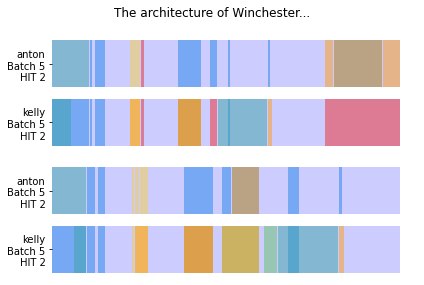

In [42]:
# You can also vizualize the agreement with, this may be helpful to 
# visualize predictions or something
draw_agreement(mult_sent)